<a href="https://colab.research.google.com/github/parthnijh/telco-customer-churn/blob/main/telco_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random
import os

SEED = 42

np.random.seed(SEED)
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Problem Statement
Given the Telco Churn Dataset we have to build a model to predict whether a customer will churn or not churn

## 2. Dataset Overview


## 3. Exploratory Data Analysis (EDA)


## 4. Data Preprocessing


## 5. Model Building


## 6. Model Evaluation



## 7. Business Insights


## 8. Conclusion & Future Work



# Dataset Overview

In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Preprocessing (1st section w/o pipeline)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
cols=["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]

for col in cols:

  df[col]=df[col].map({"Yes":1,"No":0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
for col in df:
  if df[col].dtype=="object":
    print(col)

customerID
gender
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod
TotalCharges


In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [12]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [13]:
df["gender"]=df["gender"].map({"Female":0,"Male":1})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [15]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# EDA

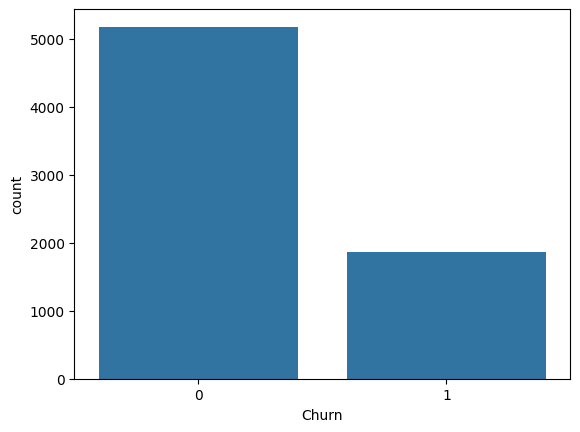

,proportion
Churn,
0,0.73463
1,0.26537


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.show()

df['Churn'].value_counts(normalize=True)


there is definitely a class imbalance in the dataset

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [18]:
nominal_features= [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaymentMethod'
]

ord_features=["Contract"]
numeric_features=["TotalCharges","MonthlyCharges","tenure"]


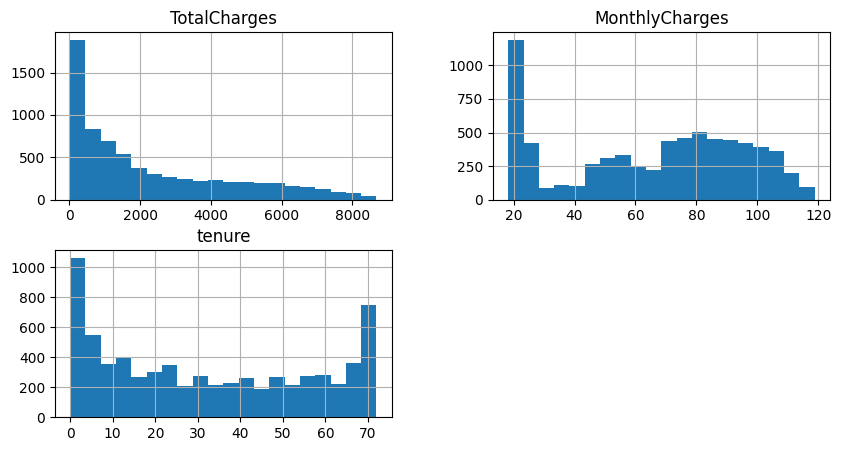

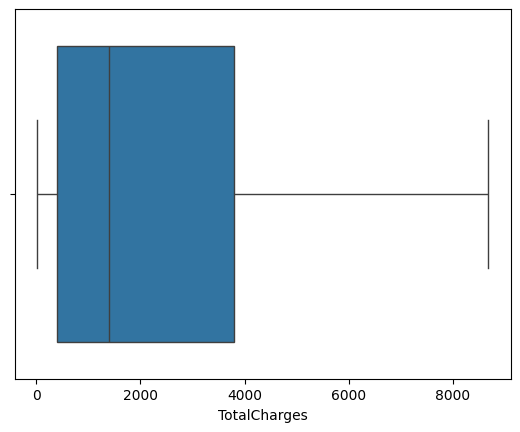

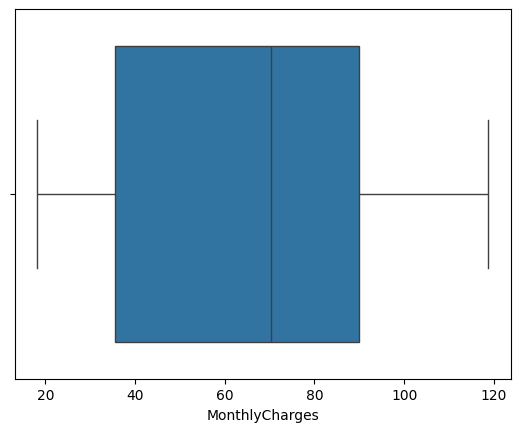

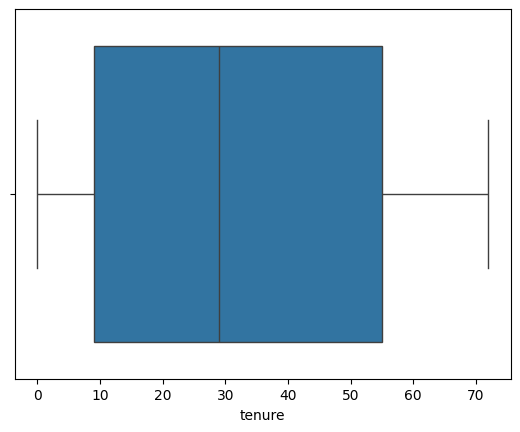

In [19]:
df[numeric_features].hist(bins=20, figsize=(10,5))
plt.show()


for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.show()

The distributions show that most customers churn very early in their lifecycle, as indicated by the heavy concentration of low tenure and low total charges. Monthly charges form clear pricing tiers, suggesting that customers belong to distinct plan segments with potentially different churn behaviors. The U-shaped tenure pattern indicates customers either leave quickly or remain long-term, making early-stage retention the most critical business focus

There arent any outliers in the numerical columns

Text(0, 0.5, 'Average Monthly Charges')

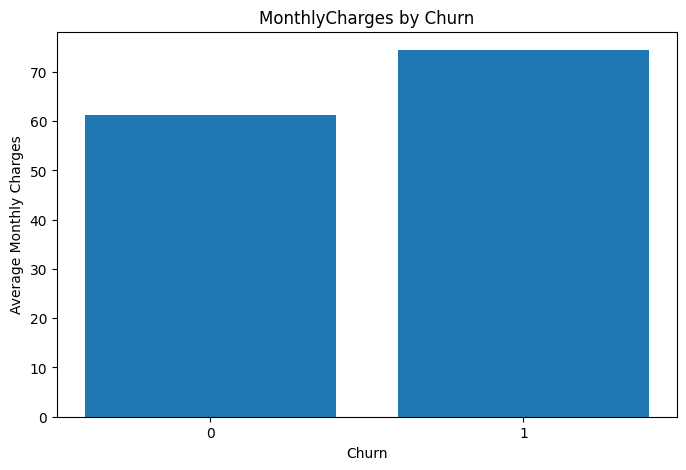

In [31]:
avg_charges = df.groupby('Churn')['MonthlyCharges'].mean()

plt.figure(figsize=(8,5))
plt.bar([0,1], avg_charges.values)
plt.xticks([0,1])
plt.title("MonthlyCharges by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Monthly Charges")

Customers who churn have higher average monthly charges than customers who stay.

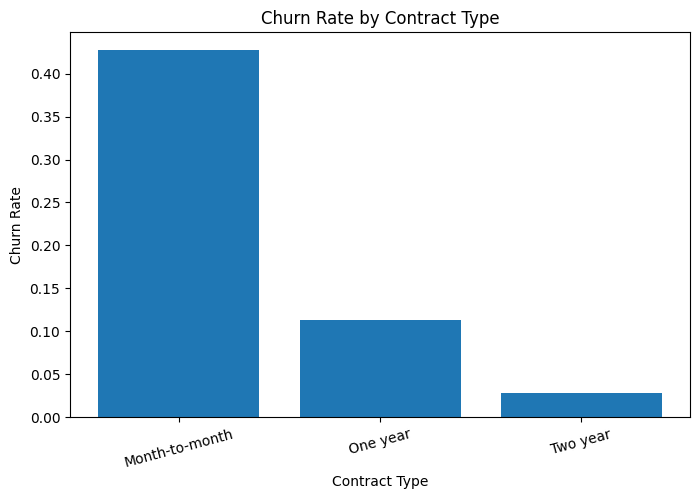

In [39]:
contract_churn_rate= df.groupby("Contract")["Churn"].mean()

plt.figure(figsize=(8,5))
plt.bar(contract_churn_rate.index, contract_churn_rate.values)
plt.xticks(rotation=15)
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()


Clearly month to month contract type has the most number of churned customers


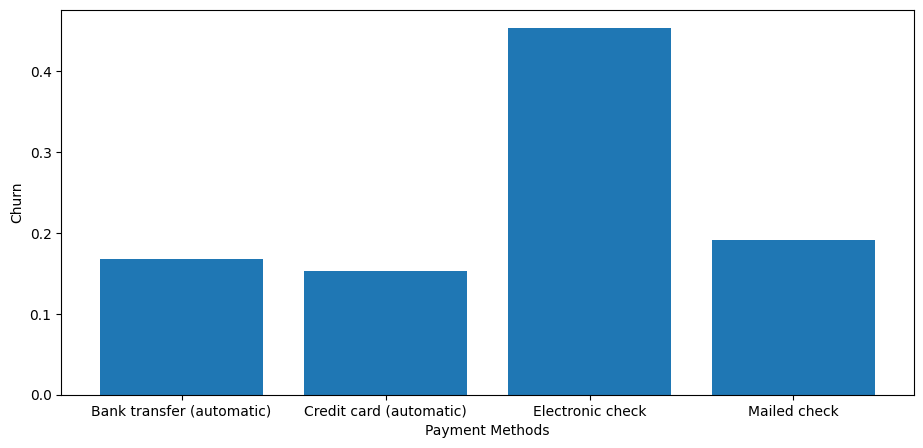

In [49]:
paymentmethodchurn=df.groupby("PaymentMethod")["Churn"].mean()
plt.figure(figsize=(11,5))

plt.bar(paymentmethodchurn.index,paymentmethodchurn.values)
plt.xlabel("Payment Methods")
plt.ylabel("Churn")
plt.show()

Clearly electronic check as a payment methods has churned the most customers

# Data Preprocessing & Model Building (#2 Pipeline Building)

In [20]:
nominal_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore"))])
ordinal_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("ordinal",OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))])
numerical_trans=Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))])


In [21]:
preprocessor=ColumnTransformer(transformers=[("ordinal",ordinal_trans,ord_features),("nominal",nominal_trans,nominal_features),("numeric",numerical_trans,numeric_features)])



In [22]:

from sklearn.model_selection import train_test_split
X=df.drop("Churn",axis=1)
X=df.drop("customerID",axis=1)
y=df["Churn"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score
models={"LR":LogisticRegression(),"RF":RandomForestClassifier(),"XG":XGBClassifier()}
for name,model in models.items():
  pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", model)
    ])
  pipeline.fit(Xtrain,ytrain)
  y_prob = pipeline.predict_proba(Xtest)[:,1]
  y_pred = (y_prob > 0.3).astype(int)


  print(classification_report(ytest, y_pred))
  print("ROC-AUC:", roc_auc_score(ytest, y_prob))



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.56      0.71      1036
           1       0.43      0.94      0.60       373

    accuracy                           0.66      1409
   macro avg       0.70      0.75      0.65      1409
weighted avg       0.82      0.66      0.68      1409

ROC-AUC: 0.8577082923597669
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1036
           1       0.51      0.69      0.59       373

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409

ROC-AUC: 0.813121719958181
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.73      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       

Insights:

If business goal = catch as many churners as possible → Model 1 is best (high recall).

If business goal = overall performance and balanced metrics → Model 3 is best.

ROC-AUC indicates all models are reasonably good at distinguishing churners vs non-churners.